In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tdc.single_pred import ADME
from utils import make_dc_split, evaluate
from train import train_rf_model, train_graph_model

In [ ]:
sns.set_palette("Set2")

In [ ]:
task_names = [
    "Caco2_Wang",
    "lipophilicity_astrazeneca",
    "BBB_Martins",
    "CYP2C19_Veith",
]
datasets = {name: ADME(name=name) for name in task_names}

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


In [138]:
type(datasets["Caco2_Wang"])

tdc.single_pred.adme.ADME

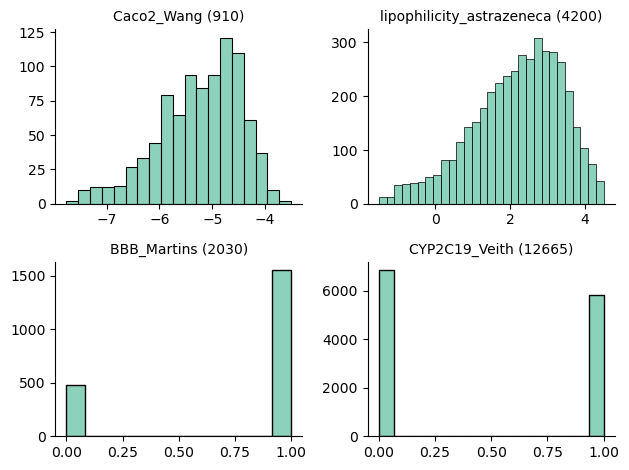

In [139]:
fig, axs = plt.subplots(2, 2)
for i, (name, data) in enumerate(datasets.items()):
    ax = axs.flatten()[i]
    y = datasets[name].get_data()["Y"]
    sns.histplot(y, ax=ax)
    ax.set_title(
        f"{name} ({len(y)})",
        fontdict={
            "size": "medium",
        },
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    sns.despine()
plt.tight_layout()

In [ ]:
import deepchem as dc

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/Users/karan/anaconda3/envs/adme/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [ ]:
dc_dataset_ecfp = make_dc_split(datasets["Caco2_Wang"], "ecfp")
dc_dataset_mol = make_dc_split(datasets["Caco2_Wang"], "molgraphconv")

100%|██████████| 910/910 [00:01<00:00, 836.06it/s] 


In [ ]:
model = train_graph_model(dc_dataset_mol, "regression", "gcn")
print(evaluate(model, dc_dataset_mol, "regression"))

0.7657255076093873


In [ ]:
mode = "classification"

model = dc.models.GCNModel(
    mode=mode,
    n_tasks=1,
    batch_size=32,
    # graph_conv_layers = [8,8],
    learning_rate=0.001,
)

patience = 20
max_epochs = 300
val_losses = []
losses = []

n_rounds_worse_loss = 0
for epoch in range(max_epochs):
    loss = model.fit(
        dc_dataset_mol["train"],
        nb_epoch=1,
        max_checkpoints_to_keep=1,
        all_losses=losses,
        deterministic=True,
    )

    if mode == "regression":
        metric = dc.metrics.Metric(dc.metrics.score_function.rms_score)
        val_loss = (
            model.evaluate(dc_dataset_mol["valid"], metrics=metric)["rms_score"] ** 2
        )
    else:
        metric = dc.metrics.Metric(dc.metrics.score_function.prc_auc_score)
        val_loss = (
            1 - model.evaluate(dc_dataset_mol["valid"], metrics=metric)["prc_auc_score"]
        )  # monitor 1 - AUC-PRC for early stopping in classification tasks

    val_losses.append(val_loss)

    if val_loss > min(val_losses[:-1], default=float("inf")):
        n_rounds_worse_loss += 1
    else:
        n_rounds_worse_loss = 0
    if n_rounds_worse_loss > patience:
        break

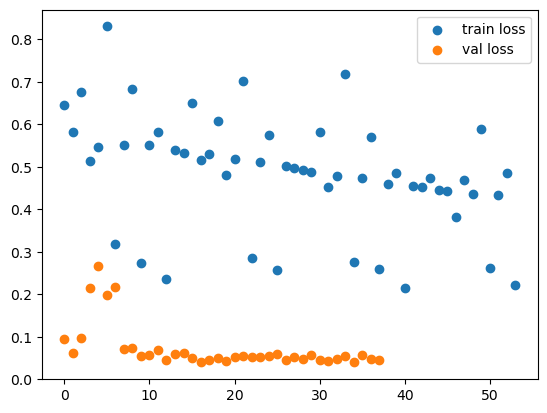

In [ ]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label="train loss")
ax.scatter(range(len(val_losses)), val_losses, label="val loss")
plt.legend(loc="upper right")

In [ ]:
model = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=32,
    # graph_conv_layers = [8,8],
    learning_rate=0.001,
)

model = dc.models.GATModel(
    mode="regression", n_tasks=1, batch_size=32, learning_rate=0.001
)

patience = 10
max_epochs = 300
val_losses = []
losses = []

n_rounds_incr_loss = 0
for epoch in range(max_epochs):
    loss = model.fit(
        dc_dataset_mol["train"],
        nb_epoch=1,
        max_checkpoints_to_keep=1,
        all_losses=losses,
        deterministic=True,
    )
    metric = dc.metrics.Metric(dc.metrics.score_function.rms_score)
    val_losses.append(
        model.evaluate(dc_dataset_mol["valid"], metrics=[metric])["rms_score"] ** 2
    )  # squared to make comparable to model L2 loss
    if val_losses[-1] > min(val_losses[:-1], default=float("inf")):
        n_rounds_incr_loss += 1
    else:
        n_rounds_incr_loss = 0
    if n_rounds_incr_loss > patience:
        break

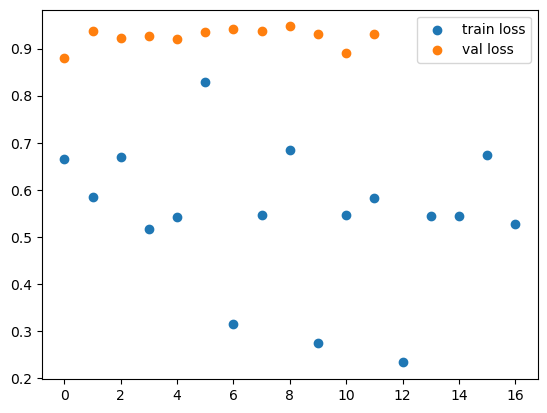

In [ ]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label="train loss")
ax.scatter(range(len(val_losses)), val_losses, label="val loss")
plt.legend(loc="upper right")

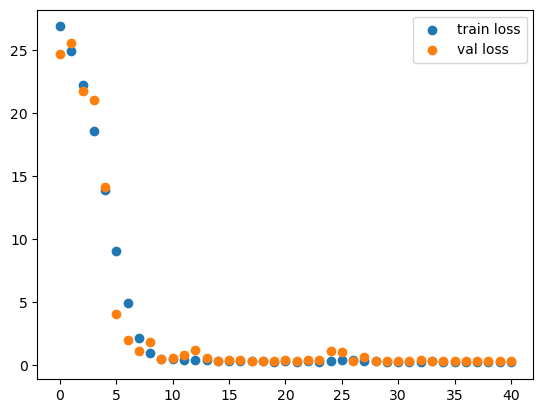

In [ ]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label="train loss")
ax.scatter(range(len(val_losses)), val_losses, label="val loss")
plt.legend(loc="upper right")

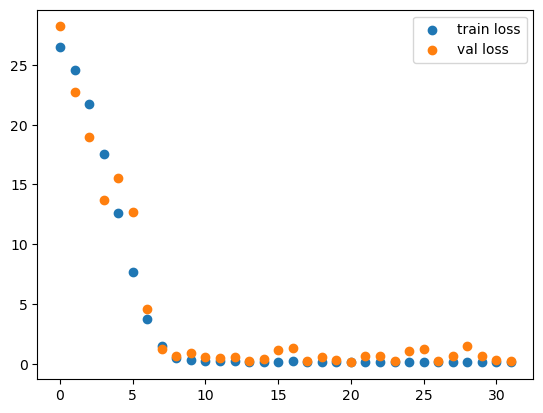

In [ ]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label="train loss")
ax.scatter(range(len(val_losses)), val_losses, label="val loss")
plt.legend(loc="upper right")

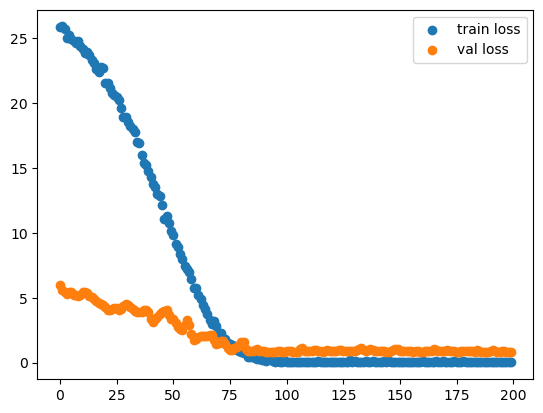

In [ ]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label="train loss")
ax.scatter(range(len(val_losses)), val_losses, label="val loss")
plt.legend(loc="upper right")